In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In this script we are going to create a model in which investors have 3 types of strategy: Mean Reversion, Momentum and Value. We do this as follows:

1) Mean reversion: The magnetic field goes in the opposite direction of the sum of the magnetization of the last 10 periods (10 periods for example, we can change it). This is justified since we see the magnetization as the change of the share price, so if it has changed positively, we believe it will go down following this strategy so we sell.

2) Momentum: Basically the opposite of mean reversion, the magnetic field goes in the same direction as the sum of the magnetization over the last 10 (or however many) periods.

3) Value: These people have calculated the fair price of the stock and will buy if the price is less than that fair price and sell otherwise. We do this by looking at whether the total accumulated magnetization (which takes into account the initial price) is lower or higher than that fair price, and the magnetic field will be positive for that agent if it is lower and negative if it is higher.

In [13]:
def spin_lattice(N):
    spin = np.random.choice([-1,1], size=(N, N))

    return spin

In [14]:
def interaction_matrix_J(N, tt):
  

  matrix = 1.1*np.random.uniform(-1, 1, size=(len(tt), N, N, N, N))
  # matrix = np.ones([N,N,N,N])/20
  for t in range(len(tt)):
    for i in range(N):
      for j in range(N):
        matrix[t,i,j,i,j] = 0
  return matrix

interaction_matrix_J(5,[1,2,3]).shape

(3, 5, 5, 5, 5)

We create a function that returns the indexes of the matrix that gives us the position of the agents that follow each strategy:

In [15]:
import random


def generate_indexes(N, p1, p2, p3):
    matrix = np.zeros((N, N), dtype=int)
    values = [1] * round(N**2 * p1) + [0] * round(N**2 * p2) + [-1] * round(N**2 * p3)

    random.shuffle(values)
    matrix.flat = values

    indexes = {"mean_reversion": [], "momentum": [], "value": []}
    for i in range(N):
      for j in range(N):
          if matrix[i,j] == 1:
            indexes["mean_reversion"].append([i,j])
          elif matrix[i,j] == 0:
            indexes["momentum"].append([i,j])
          elif matrix[i,j] == -1:
            indexes["value"].append([i,j])
    return indexes

generate_indexes(3,p1=0.3,p2=0.3,p3=0.4)

{'mean_reversion': [[0, 0], [2, 2]],
 'momentum': [[0, 2], [1, 0], [2, 1]],
 'value': [[0, 1], [1, 1], [1, 2], [2, 0]]}

Here we create the matrix of the magnetic field h. This matrix is created dynamically at each time t.

In [16]:
def magnetic_field_h(N, cumulative_magnetization, instant_magnetization, fair_price, t_indx, indexes, period=10):

    min_h_t = 0
    max_h_t = 0  

    h_field_t = np.zeros([N,N])

    # For mean reversion and momentum
    if t_indx > period:
      change = sum(instant_magnetization[t_indx-period:t_indx])
    else:
      change = sum(instant_magnetization[:t_indx])
      
    if change > 0:
      h_mean_reversion = np.random.uniform(-0.3,0)
      h_momentum = np.random.uniform(0,0.3)
    elif change < 0:
      h_mean_reversion = np.random.uniform(0,2)
      h_momentum = np.random.uniform(-2,0)
    else:
      h_mean_reversion = 0
      h_momentum = 0

    # For value:
    if cumulative_magnetization[t_indx-1] > fair_price:
      h_value = np.random.uniform(-0.5,0)
    elif cumulative_magnetization[t_indx-1] < fair_price:
      h_value = np.random.uniform(0,0.5)
    else: # If it is equal:
      h_value = 0


    for strategy, indxs in indexes.items():
      for i,j in indxs:
        if strategy == "mean_reversion":
          h_field_t[i,j] = h_mean_reversion
        elif strategy == "momentum":
          h_field_t[i,j] = h_momentum
        elif strategy == "value":
          h_field_t[i,j] = h_value


    return h_field_t

magnetic_field_h(3,[0,1,2,3,4,5,6,7,8,9], [0,-1,1,1,0,-1,1,-1,-1,1,0,1,1,1,-1,-1,0,1,-1,-1,1,-1,0], 4, 6, {'mean_reversion': [[0, 0], [0, 1], [1, 2]],
 'momentum': [[1, 0], [2, 0], [2, 2]],
 'value': [[0, 2], [1, 1], [2, 1]]})

array([[ 0.        ,  0.        , -0.29027885],
       [ 0.        , -0.29027885,  0.        ],
       [ 0.        , -0.29027885,  0.        ]])

In [17]:
def flip_energy(spin, interaction_matrix_J, matrix_h, i, j, t):
  E = 0
  E += 2*spin[i,j]*matrix_h[i,j]
  N = spin.shape[0]
  for k in range(N):
    for l in range(N):
      E += 2*interaction_matrix_J[t,i,j,k,l]*spin[i,j]*spin[k,l]

  return E

In [18]:
def active_agents(AA,N):

    
    x = random.sample(range(0, N), AA)
    y = random.sample(range(0, N), AA)

    return x, y

{'mean_reversion': [], 'momentum': [], 'value': [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]}


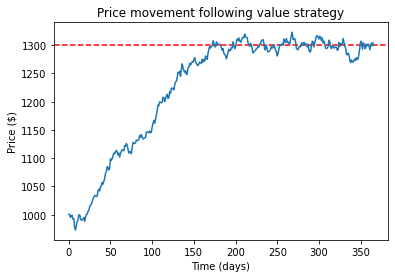

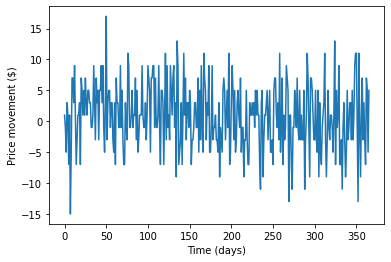

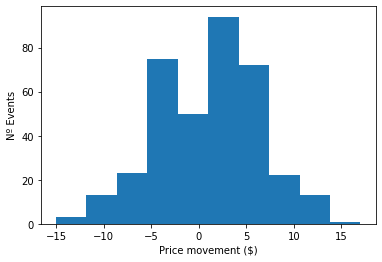

In [69]:
N = 5
AA = N
t0 = 0
tmax = 365
TT = np.linspace(1,10,11)
fair_price = 1300
p1,p2,p3 = 0,0,1
indexes = generate_indexes(N,p1,p2,p3)
print(indexes)

tt = np.arange(t0,tmax + 1, 1)
cum_mag = 1000 # La ponemos a 100$
spin = spin_lattice(N)
J = interaction_matrix_J(N,tt)

cum_mag_list = []
inst_mag_list = []
TT = [0.1]

for T in TT:
  for t in range(len(tt)):
      M_inst = 0
      if t == 0:
        h = np.zeros((N,N))
      else:
        h = magnetic_field_h(N,cum_mag_list,inst_mag_list,fair_price,t,indexes,period=10)

      # if t%100 == 0:
      #   print(t)
      #   print(h)
      AA_x, AA_y = active_agents(AA,N)
      for i in AA_x:
          for j in AA_y:

              flip_E = flip_energy(spin, J, h, i, j, t)
              uni_sample = random.uniform(0, 1)

              if flip_E <= 0:
                  spin[i, j] = -spin[i, j]

              elif (flip_E > 0) and (np.exp(-flip_E/T) >= uni_sample):
                  spin[i, j] = -spin[i, j]

              else:
                  spin[i, j] = spin[i, j]

              cum_mag += spin[i, j]
              M_inst += spin[i,j] 

      cum_mag_list.append(cum_mag)
      inst_mag_list.append(M_inst)

if p3 != 0:
  plt.axhline(y=fair_price, color='r', linestyle='--')

plt.plot(tt, cum_mag_list)
plt.title("Price movement following value strategy")
plt.xlabel("Time (days)")
plt.ylabel("Price ($)")
plt.Figure(figsize=(10,10))
plt.savefig("Strategy.png")
plt.show()

plt.plot(tt, inst_mag_list)
plt.xlabel("Time (days)")
plt.ylabel("Price movement ($)")
plt.show()

plt.hist(inst_mag_list)
plt.xlabel("Price movement ($)")
plt.ylabel("Nº Events")
plt.show()



# **Analysis**

All in value:
- The lower the temperature, the faster it goes to price and the less it oscillates around this price. This makes sense since we interpret the temperature as how “hot” the market is, at high T investors react more sharply and there is less stability in the market.
- If we increase the temperature, it takes much longer to reach the right price, and once it is reached, it deviates more from there. We can interpret this to mean that even though they know the price is right, they are not as determined to get that price because of hesitation or reactions to other things.
- Also, the bigger we make h the less the price will swing from its original value.

All in mean reversion:
 - If we set all mean_reverse, the price oscillates a lot, it does not follow clear trends (which makes sense). Also, the larger the periods_strategy variable, the less the price deviates from the initial price (also makes sense).
 - The smaller the temperature, the less the price deviates from the original price.

All in momentum:
- If we put everyone on momentum, the price oscillates much less (although it still oscillates and still has reversals) and follows much clearer trends.
- The higher the temperature, the less clear is the trend that the market follows (the more oscillations there are within a trend).
- If we lengthen the period, the trend is much clearer, while if we shorten the period, there are many different trends (it makes sense, if you shorten the period, you allow small momentary changes to have a greater impact on future actions as it adds up over fewer periods, while if you lengthen the period a small change is much more diffused).

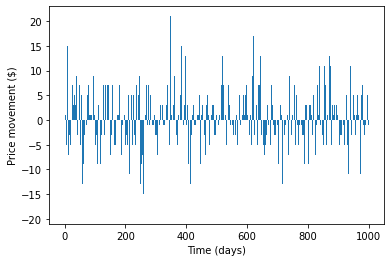

In [20]:
plt.bar(tt, inst_mag_list)
plt.xlabel("Time (days)")
plt.ylabel("Price movement ($)")
plt.show()